## Dataset credits: https://github.com/myleott/mnist_png

In [1]:
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pylab as pl
import os
import cv2
import random
warnings.filterwarnings('ignore')
%matplotlib inline
pl.gray()

In [2]:
train='mnist_png/training/'
temp=np.array([[(a,cv2.imread(str(train+a+"/"+x),0)) for x in os.listdir(train+a)] for a in os.listdir(train)])
data = [x for sublist in temp for x in sublist]
random.shuffle(data)
y_train,x_train=zip(*data)
x_train=np.array(x_train)
y_train=np.array(y_train)

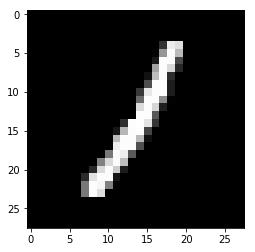

In [3]:
pl.imshow(x_train[421])

In [4]:
test='mnist_png/testing/'
temp=np.array([[(a,cv2.imread(str(test+a+"/"+x),0)) for x in os.listdir(test+a)] for a in os.listdir(test)])
data = [x for sublist in temp for x in sublist]
random.shuffle(data)
y_test,x_test=zip(*data)
x_test=np.array(x_test)
y_test=np.array(y_test)

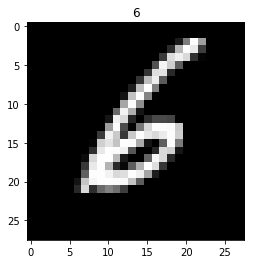

In [5]:
pl.imshow(x_test[420])
pl.title(y_test[420])

In [6]:
X_test=np.array([np.reshape(image,784) for image in x_test])
X_train=np.array([np.reshape(image,784) for image in x_train])

In [7]:
from sklearn.svm import LinearSVC

In [8]:
clf=LinearSVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.88370000000000004

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
clf=RandomForestClassifier(n_estimators=500,n_jobs=-1)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9718

In [11]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout

Using TensorFlow backend.


In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory('mnist_png/training/',target_size=(28,28),batch_size=32,class_mode="categorical")
test_set=test_datagen.flow_from_directory('mnist_png/testing/',target_size=(28,28),batch_size=32,class_mode="categorical")

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [43]:
clf=Sequential()
clf.add(Convolution2D(20,3,3,input_shape=(28,28,3),activation='relu'))
clf.add(MaxPooling2D(pool_size=(2,2)))
clf.add(Convolution2D(20,3,3,activation='relu'))
clf.add(MaxPooling2D(pool_size=(2,2)))
clf.add(Convolution2D(20,3,3,activation='relu'))
clf.add(MaxPooling2D(pool_size=(2,2)))
clf.add(Flatten())
clf.add(Dense(output_dim=128,activation='relu'))
clf.add(Dense(output_dim=128,activation='relu'))
clf.add(Dense(output_dim=10,activation='sigmoid'))
clf.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
clf.fit_generator(training_set,samples_per_epoch=8000,nb_epoch=25,validation_data=test_set,nb_val_samples=2000)

Epoch 1/25
250/250 [==============================] - 42s - loss: 1.0950 - acc: 0.6191 - val_loss: 0.5236 - val_acc: 0.8423
Epoch 2/25
250/250 [==============================] - 50s - loss: 0.5085 - acc: 0.8360 - val_loss: 0.2572 - val_acc: 0.9223
Epoch 3/25
250/250 [==============================] - 55s - loss: 0.3576 - acc: 0.8889 - val_loss: 0.1876 - val_acc: 0.9394
Epoch 4/25
250/250 [==============================] - 57s - loss: 0.2901 - acc: 0.9056 - val_loss: 0.1661 - val_acc: 0.9485
Epoch 5/25
250/250 [==============================] - 59s - loss: 0.2507 - acc: 0.9205 - val_loss: 0.1379 - val_acc: 0.9576
Epoch 6/25
250/250 [==============================] - 56s - loss: 0.2213 - acc: 0.9313 - val_loss: 0.1389 - val_acc: 0.9557
Epoch 7/25
250/250 [==============================] - 52s - loss: 0.2059 - acc: 0.9350 - val_loss: 0.1306 - val_acc: 0.9595
Epoch 8/25
250/250 [==============================] - 53s - loss: 0.1826 - acc: 0.9400 - val_loss: 0.1330 - val_acc: 0.9574
Epoch 9/